In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive

 2305557_assigment.zip
 Aurélien-Géron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O’Reilly-Media-2019_copy.pdf
 best_egyptian_money_model.h5
'Cloud Computing Quiz S3, EC2, and IAM_Practical_Setup.mp4'
'Colab Notebooks'
 data
 dataset
'ML_sheet7 (2305298).pdf'
 mohamed_ahmed_fayek_2305298.pdf
'mohamed Ahmed Fayek (2305298).pdf'
 n8n_sheet.gsheet
 network_sheet_6.pdf
 Sheet1_Mohamed_Ahmed_Fayek.pdf
 sheet_7_ans.pdf


In [3]:
!ls

drive  sample_data


In [4]:
!ls /content/drive/MyDrive/dataset


test  train  valid


In [5]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight

In [6]:
import warnings
warnings.filterwarnings('ignore')
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 70

In [11]:
train_dir = "/content/drive/MyDrive/dataset/train"
val_dir   = "/content/drive/MyDrive/dataset/valid"
test_dir  = "/content/drive/MyDrive/dataset/test"

In [12]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.25,
    width_shift_range=0.25,
    height_shift_range=0.25,
    horizontal_flip=True,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
    fill_mode='reflect'
)

In [13]:
val_test_gen = ImageDataGenerator(rescale=1./255)

In [14]:
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 2965 images belonging to 9 classes.


In [15]:
val_data = val_test_gen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 760 images belonging to 9 classes.


In [16]:
test_data = val_test_gen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 290 images belonging to 9 classes.


In [17]:
NUM_CLASSES = len(train_data.class_indices)

In [18]:
print(f"\Found {NUM_CLASSES} classes: {list(train_data.class_indices.keys())}")
print(f"Training samples: {train_data.samples}")
print(f"Validation samples: {val_data.samples}")
print(f"Test samples: {test_data.samples}")

\Found 9 classes: ['1', '10', '10 (new)', '100', '20', '20 (new)', '200', '5', '50']
Training samples: 2965
Validation samples: 760
Test samples: 290


In [19]:
def cnn(input_shape=(224, 224, 3), num_classes=NUM_CLASSES):
    model = models.Sequential(name='ImprovedEgyptianMoneyCNN')


    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.35))

    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))


    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [20]:
model =cnn(input_shape=(224, 224, 3), num_classes=NUM_CLASSES)

In [21]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)
model.summary()

Model: "ImprovedEgyptianMoneyCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 13,430,601 (51.23 MB)

 Trainable params: 13,420,105 (51.19 MB)

 Non-trainable params: 10,496 (41.00 KB)

In [22]:
class_weights = compute_class_weight(
    'balanced',
    classes=np.arange(NUM_CLASSES),
    y=train_data.classes
)
class_weight_dict = dict(enumerate(class_weights))

print("Class weights:", class_weight_dict)

Class weights: {0: np.float64(0.9983164983164983), 1: np.float64(1.035988819007687), 2: np.float64(1.0392569225376795), 3: np.float64(0.9983164983164983), 4: np.float64(0.9983164983164983), 5: np.float64(0.9521515735388568), 6: np.float64(0.9983164983164983), 7: np.float64(0.9863606121091151), 8: np.float64(0.9983164983164983)}


In [23]:
callbacks = [
    # Save best model
    ModelCheckpoint(
        '/content/drive/MyDrive/best_egyptian_money_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),

    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        mode='max',
        verbose=1
    ),

    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )
]


In [24]:
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.1628 - loss: 3.2956
Epoch 1: val_accuracy improved from -inf to 0.10658, saving model to /content/drive/MyDrive/best_egyptian_money_model.h5
93/93 ━━━━━━━━━━━━━━━━━━━━ 1139s 12s/step - accuracy: 0.1630 - loss: 3.2930 - val_accuracy: 0.1066 - val_loss: 36.5724 - learning_rate: 0.0010
Epoch 2/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - accuracy: 0.1979 - loss: 2.6561
Epoch 2: val_accuracy did not improve from 0.10658
93/93 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.1980 - loss: 2.6555 - val_accuracy: 0.1066 - val_loss: 5.3801 - learning_rate: 0.0010
Epoch 3/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 896ms/step - accuracy: 0.2071 - loss: 2.4721
Epoch 3: val_accuracy improved from 0.10658 to 0.13684, saving model to /content/drive/MyDrive/best_egyptian_money_model.h5
93/93 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.2071 - loss: 2.4718 - val_accuracy: 0.1368 - val_loss: 5.0652 - learning_rate: 0.0010
Epoch 4/70
93/93 ━━━━━━━━━━━

In [25]:
def plot_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy
    axes[0].plot(history.history['accuracy'], label='Training', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
    axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Loss
    axes[1].plot(history.history['loss'], label='Training', linewidth=2)
    axes[1].plot(history.history['val_loss'], label='Validation', linewidth=2)
    axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/training_history.png', dpi=300, bbox_inches='tight')
    plt.show()
    best_epoch = np.argmax(history.history['val_accuracy'])
    print(f"\n Best Validation Accuracy: {history.history['val_accuracy'][best_epoch]*100:.2f}%")
    print(f" Achieved at Epoch: {best_epoch + 1}")


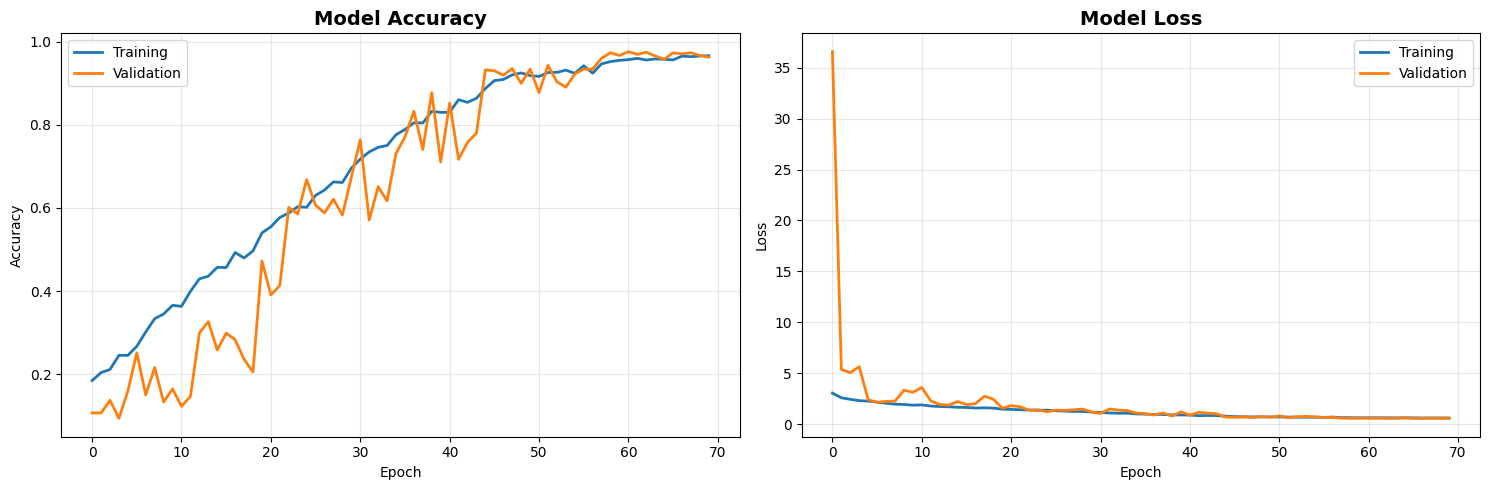


 Best Validation Accuracy: 97.63%
 Achieved at Epoch: 61


In [26]:
plot_history(history)

In [27]:
# ADD THIS AS THE FIRST CELL OR AT THE VERY TOP
import warnings
warnings.filterwarnings('ignore')

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [28]:
model = keras.models.load_model('/content/drive/MyDrive/best_egyptian_money_model.h5')

In [29]:
test_loss, test_accuracy = model.evaluate(test_data, verbose=0)

In [30]:
print(f" Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


 Test Accuracy: 97.24%
Test Loss: 0.5854


In [31]:
if test_accuracy >= 0.93:
    print("DONE")

DONE


In [32]:
y_pred_probs = model.predict(test_data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_data.classes


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 603ms/step


In [33]:
class_names = list(train_data.class_indices.keys())

In [34]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
          10       0.97      0.94      0.96        35
    10 (new)       1.00      1.00      1.00        30
         100       0.97      0.97      0.97        35
          20       1.00      0.89      0.94        35
    20 (new)       1.00      1.00      1.00        30
         200       0.95      1.00      0.97        35
           5       0.94      0.97      0.96        35
          50       0.95      1.00      0.97        35

    accuracy                           0.97       290
   macro avg       0.98      0.97      0.97       290
weighted avg       0.97      0.97      0.97       290



In [35]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Egyptian Money Classification',
              fontsize=14, fontweight='bold', pad=20)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()


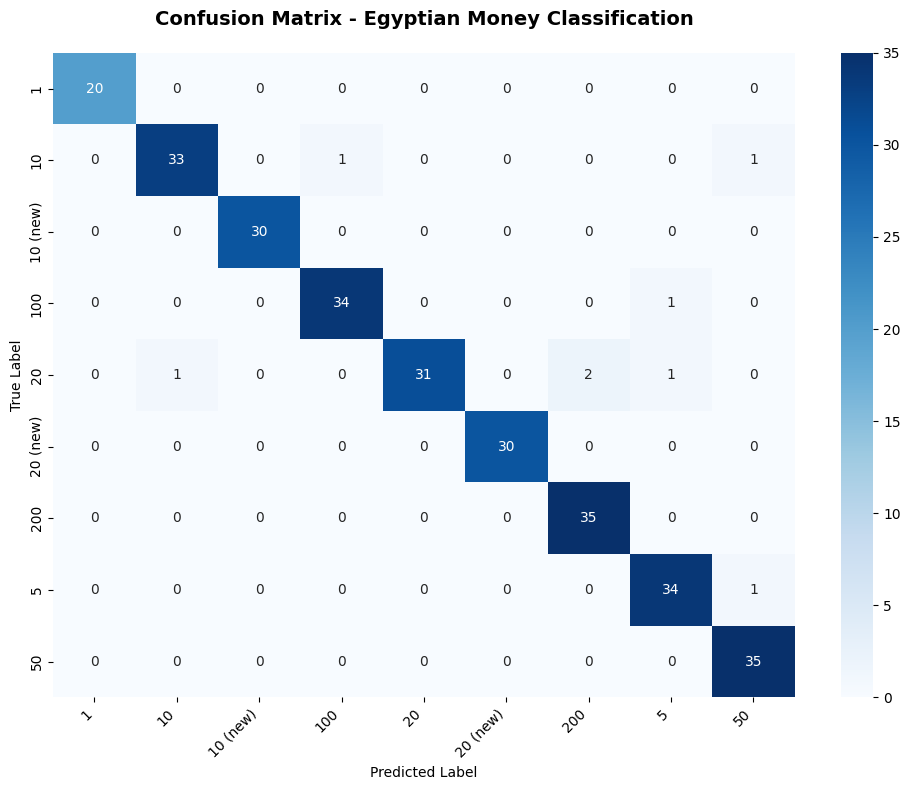

In [36]:
plot_confusion_matrix(y_true, y_pred, class_names)